In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
# import matplotlib.pyplot as plt
# %matplotlib inline

# Reading the dataset into the Python Jupyter Environment

In [28]:
df = pd.read_csv("adult.data", header=None, sep=", ")

<ipython-input-28-bcd8edaa76df>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("adult.data", header=None, sep=", ")


In [29]:
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]

# Data Pre-Processing/Cleaning

In [30]:
df.isna().sum().sum()

0

In [31]:
pd.Series(np.count_nonzero(df.to_numpy()=='?', axis=0), index=df.columns)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary-range         0
dtype: int64

In [32]:
df = df[df["workclass"] != '?']

In [33]:
df = df[df["occupation"] != '?']

In [34]:
df = df[df["native-country"] != '?']

In [35]:
pd.Series(np.count_nonzero(df.to_numpy()=='?', axis=0), index=df.columns)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary-range      0
dtype: int64

In [36]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Splitting the Data Collection into two parts

First Part - Data Containing records where the class feature or the salary is less than or equal to 50k

In [37]:
df_records_below_50K = df[df["salary-range"] == "<=50K"]

Second Part - Data Containing records where the class feature or the salary is greater than 50k

In [38]:
df_records_above_50K = df[df["salary-range"] == ">50K"]

Merging both the parts back into the initial dataframe as one

In [39]:
df = pd.concat([df_records_above_50K, df_records_below_50K])

Here since we have used a different feature name called salary-range as opposed to class - we are adding the class feature as a class type column containing either 1 or 0. So, if the value of the salary-range is >50k then the class column will contain 1 or else it will contain 0.

In [40]:
df['class'] = (df["salary-range"] == ">50K")*1

Updated dataframe df with the class type class column

In [41]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range,class
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


# Multivariate Analysis using Scatter Plot for important features

In [48]:
def plot_scatter_plot(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (30 , 30))
    fig.subplots_adjust(hspace = .5)
    
    print("Scatter Plot between - '", column1, "' and '", column2, "' for the data collection containing records where the salary-range is <=50k")
    print()
    
    x = df_records_below_50K[column1]
    y = df_records_below_50K[column2]
    axes[0, 0].scatter(x , y)
    axes[0, 0].set_title("<=50K")
    axes[0, 0].set_xlabel(column1)
    axes[0, 0].set_ylabel(column2)
    
    print("Scatter Plot between - '", column1, "' and '", column2, "' for the data collection containing records where the salary-range is >50k")
    print()
    
    x = df_records_above_50K[column1]
    y = df_records_above_50K[column2]
    axes[0, 1].scatter(x , y)
    axes[0, 1].set_title(">50K")
    axes[0, 1].set_xlabel(column1)
    axes[0, 1].set_ylabel(column2)
    
    print("Scatter Plot between - '", column2, "' and '", column3, "' for the data collection containing records where the salary-range is <=50k")
    
    x = df_records_below_50K[column2]
    y = df_records_below_50K[column3]
    axes[1, 0].scatter(x , y)
    axes[1, 0].set_title("<=50K")
    axes[1, 0].set_xlabel(column2)
    axes[1, 0].set_ylabel(column3)
    
    print("Scatter Plot between - '", column2, "' and '", column3, "' for the data collection containing records where the salary-range is >50k")
    print()
    
    x = df_records_above_50K[column2]
    y = df_records_above_50K[column3]
    axes[1, 1].scatter(x , y)
    axes[1, 1].set_title(">50K")
    axes[1, 1].set_xlabel(column2)
    axes[1, 1].set_ylabel(column3)
    
    print("Scatter Plot between - '", column1, "' and '", column3, "' for the data collection containing records where the salary-range is <=50k")
    print()
    
    x = df_records_below_50K[column3]
    y = df_records_below_50K[column1]
    axes[2, 0].scatter(x , y)
    axes[2, 0].set_title("<=50K")
    axes[2, 0].set_xlabel(column3)
    axes[2, 0].set_ylabel(column1)
    
    print("Scatter Plot between - '", column1, "' and '", column2, "' for the data collection containing records where the salary-range is >50k")
    print()
    
    x = df_records_above_50K[column3]
    y = df_records_above_50K[column1]
    axes[2, 1].scatter(x , y)
    axes[2, 1].set_title(">50K")
    axes[2, 1].set_xlabel(column3)
    axes[2, 1].set_ylabel(column1)
    
    plt.show()

Scatter Plot between - ' capital-gain ' and ' age ' for the data collection containing records where the salary-range is <=50k

Scatter Plot between - ' capital-gain ' and ' age ' for the data collection containing records where the salary-range is >50k

Scatter Plot between - ' age ' and ' hours-per-week ' for the data collection containing records where the salary-range is <=50k
Scatter Plot between - ' age ' and ' hours-per-week ' for the data collection containing records where the salary-range is >50k

Scatter Plot between - ' capital-gain ' and ' hours-per-week ' for the data collection containing records where the salary-range is <=50k

Scatter Plot between - ' capital-gain ' and ' age ' for the data collection containing records where the salary-range is >50k



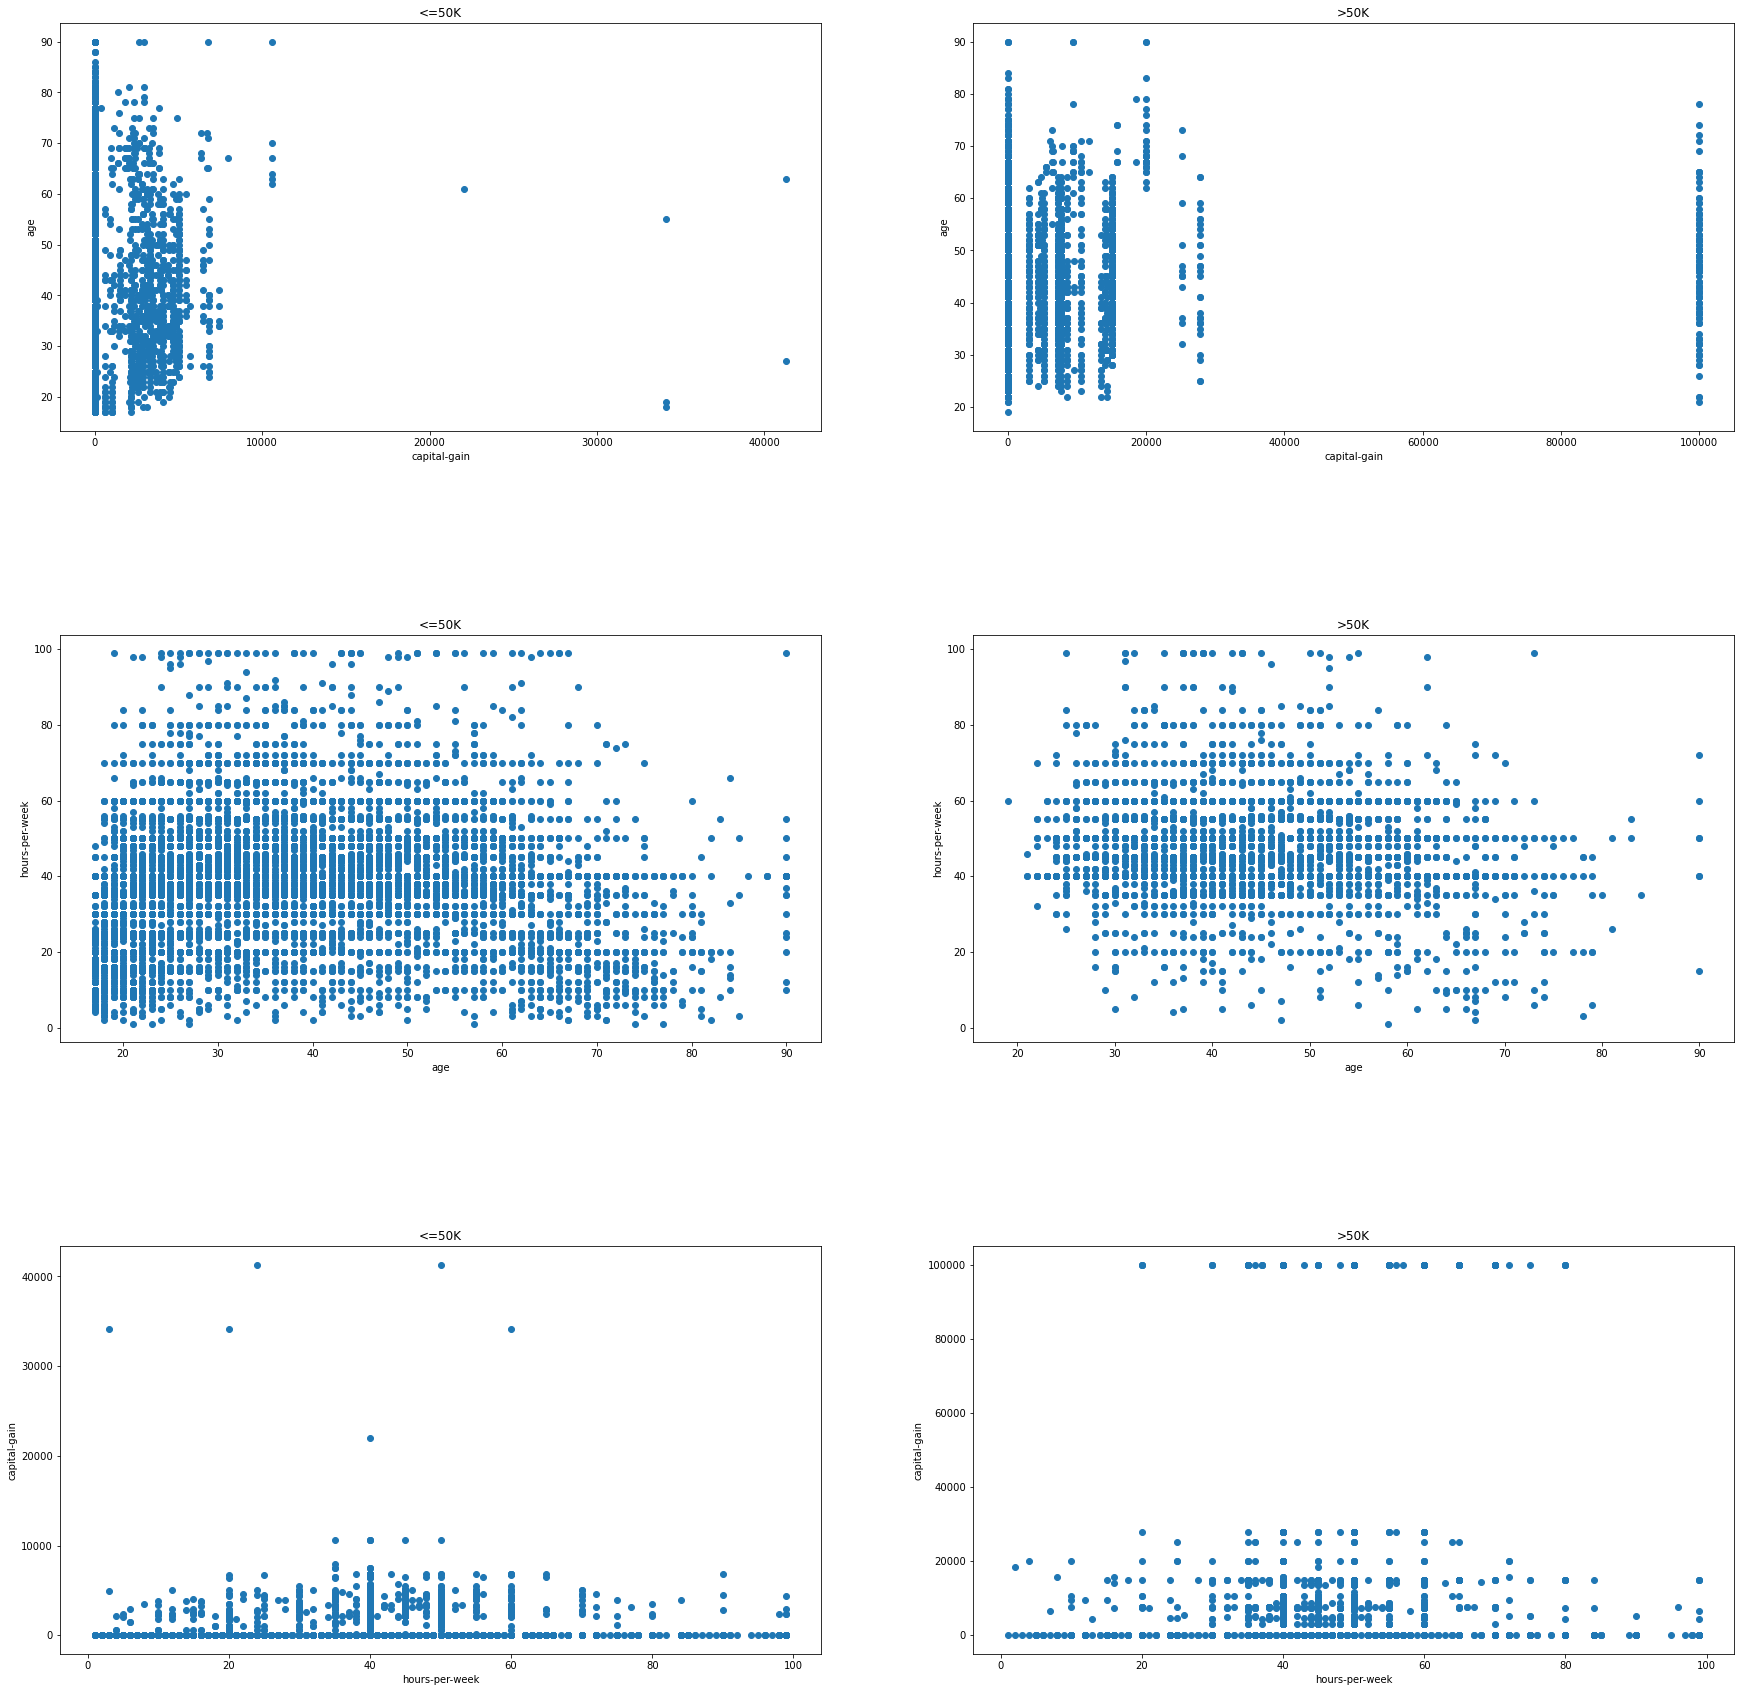

In [49]:
plot_scatter_plot('capital-gain', 'age', 'hours-per-week')

In [69]:
def plot_scatter_plot_diff(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (30 , 30))
    fig.subplots_adjust(hspace = .5)
    
    colors = df['class']
    x = df[column1]
    y = df[column2]
    axes[0].scatter(x , y , c = colors)
    axes[0].set_title("purple <=50K, yellow >50K")
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel(column2)
    
    x = df[column2]
    y = df[column3]
    axes[1].scatter(x , y , c = colors)
    axes[1].set_title("purple <=50K, yellow >50K")
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel(column3)
    
    x = df[column3]
    y = df[column1]
    axes[2].scatter(x , y , c = colors)
    axes[2].set_title("purple <=50K, yellow >50K")
    axes[2].set_xlabel(column3)
    axes[2].set_ylabel(column1)
    
    plt.show()

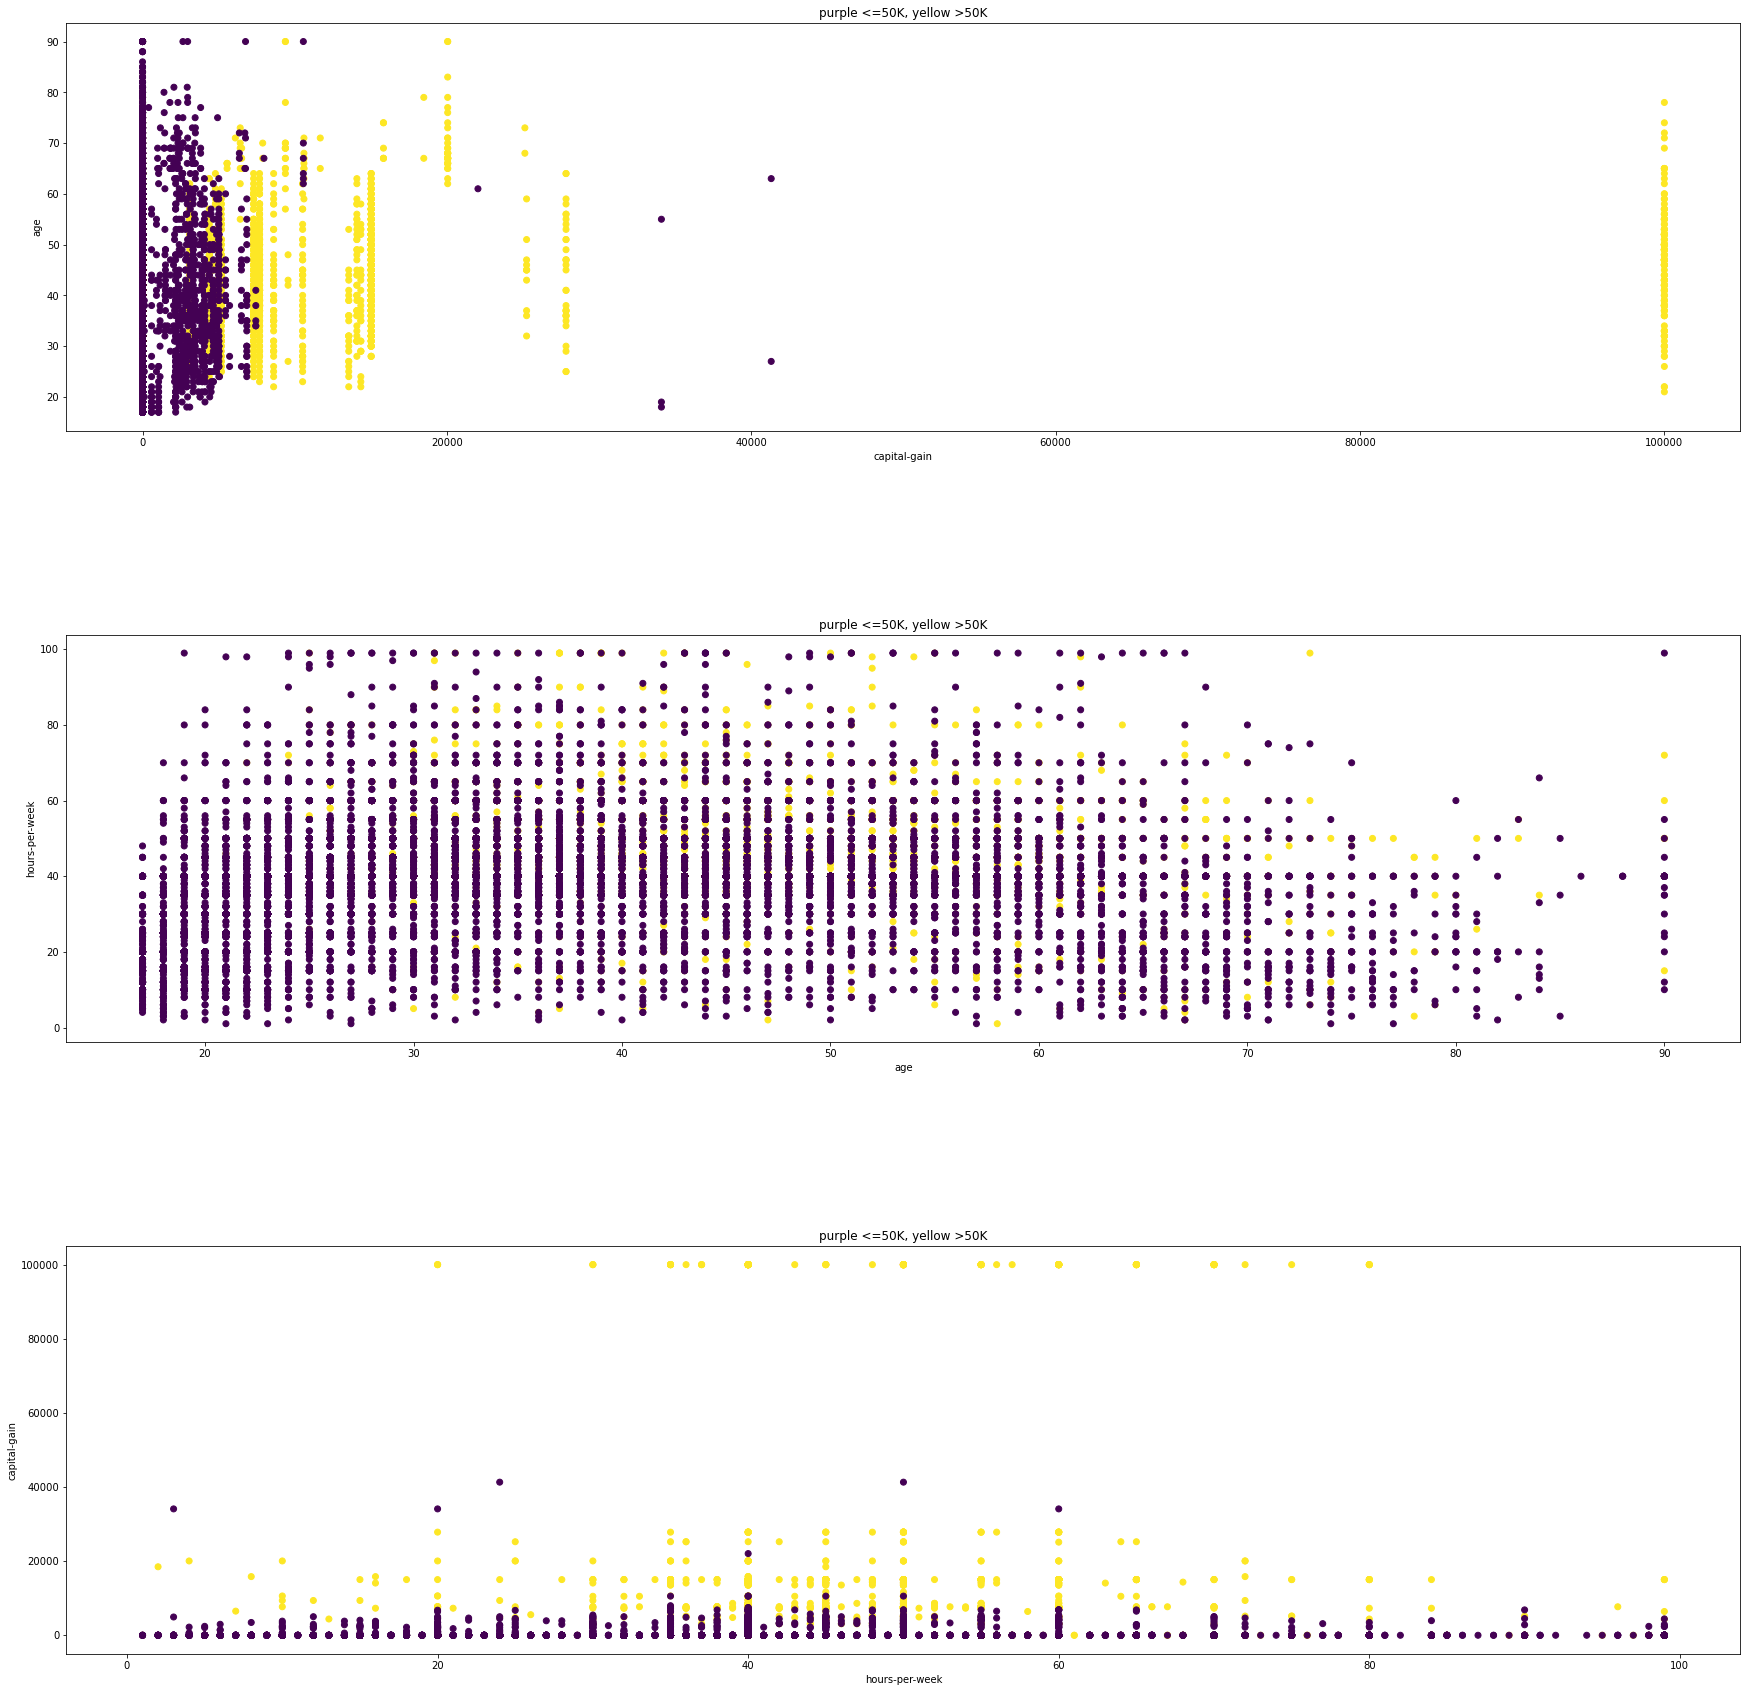

In [70]:
plot_scatter_plot_diff('capital-gain', 'age', 'hours-per-week')

In [73]:
def plot_scatter_matrix_below50K(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols = 1 , nrows = 1, figsize = (20 , 30))
    fig.subplots_adjust(hspace = .5)
    df_below_50k_scatter_matrix = df_records_below_50K[[column1, column2, column3]]
    print("Salary <=50K")
    pd.plotting.scatter_matrix(df_below_50k_scatter_matrix, ax = axes)
    plt.show()

Salary <=50K


<ipython-input-73-f4d6b2146239>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df_below_50k_scatter_matrix, ax = axes)


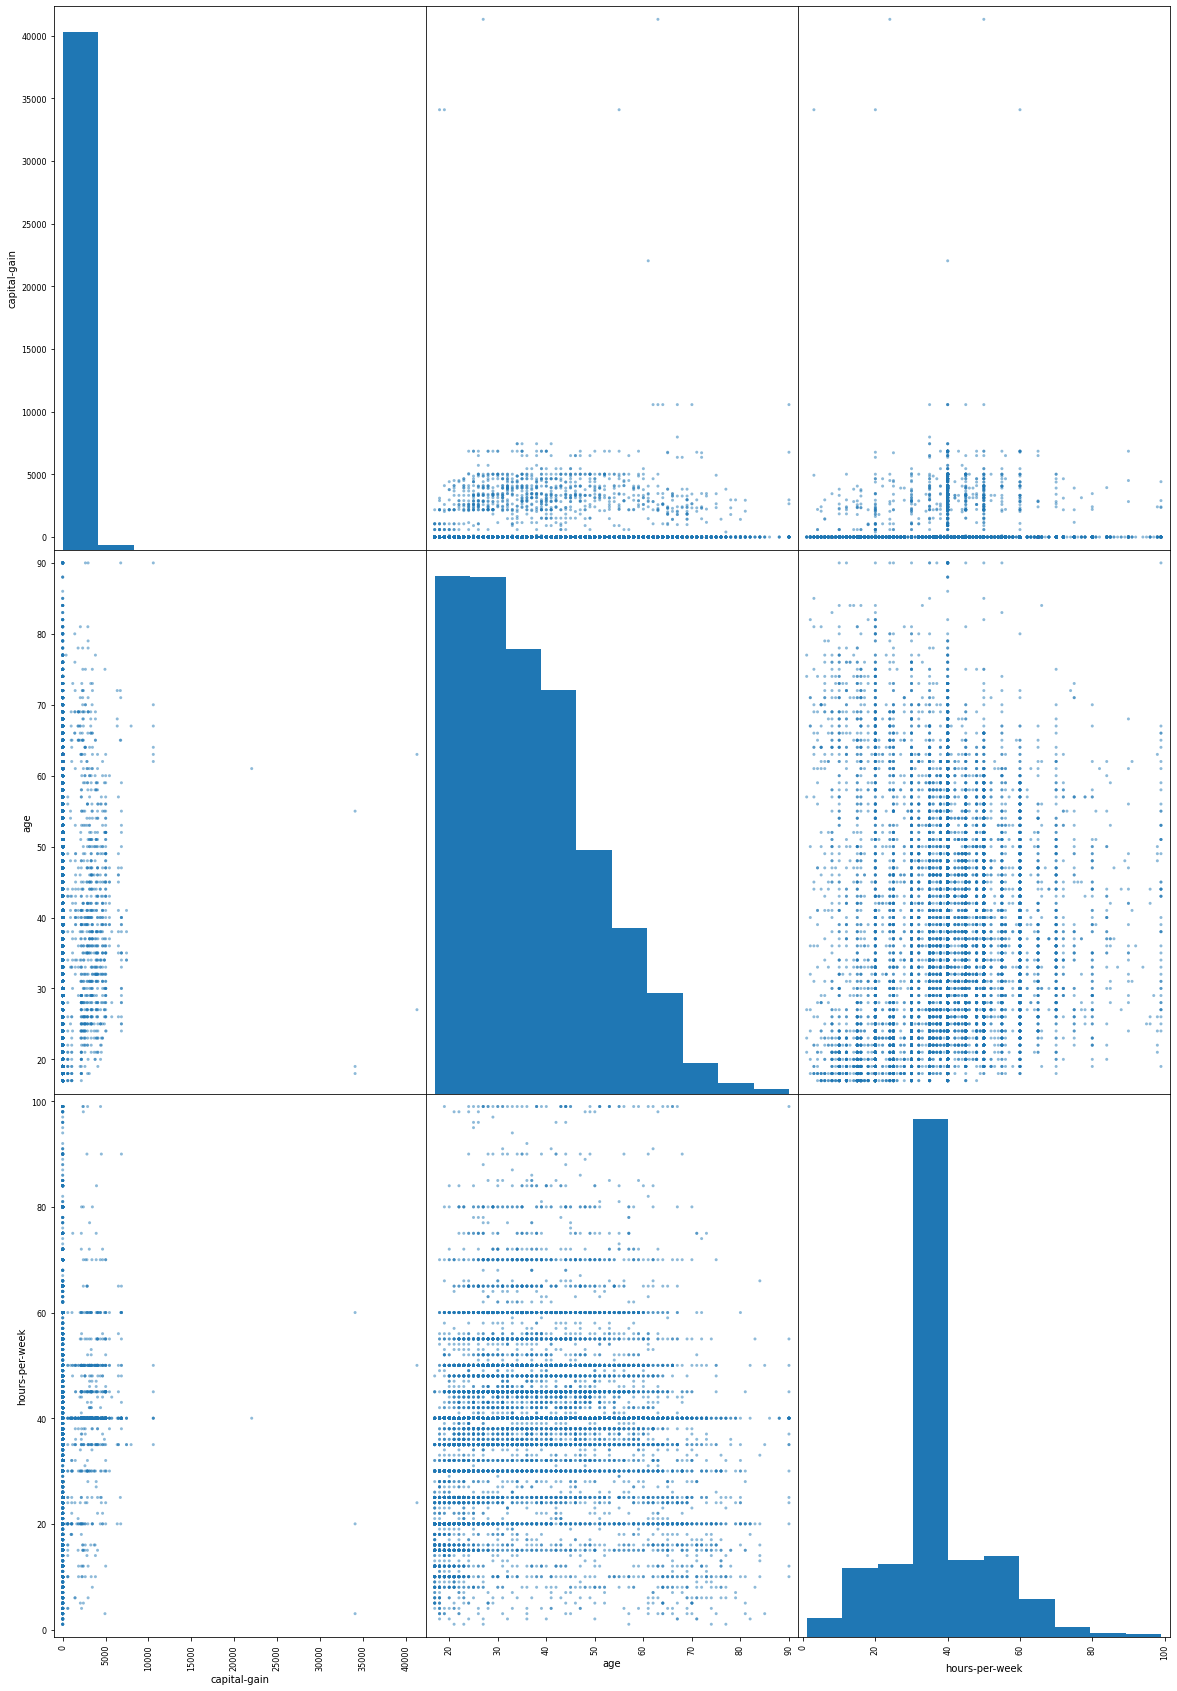

In [74]:
plot_scatter_matrix_below50K('capital-gain', 'age', 'hours-per-week')

In [75]:
def plot_scatter_matrix_above50K(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 30))
    fig.subplots_adjust(hspace = .5)
    df_above_50k_scatter_matrix = df_records_above_50K[[column1, column2, column3]]
    print("Salary >50K")
    pd.plotting.scatter_matrix(df_above_50k_scatter_matrix, ax = axes)
    plt.show()

Salary >50K


<ipython-input-75-fd09f4eb7054>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df_above_50k_scatter_matrix, ax = axes)


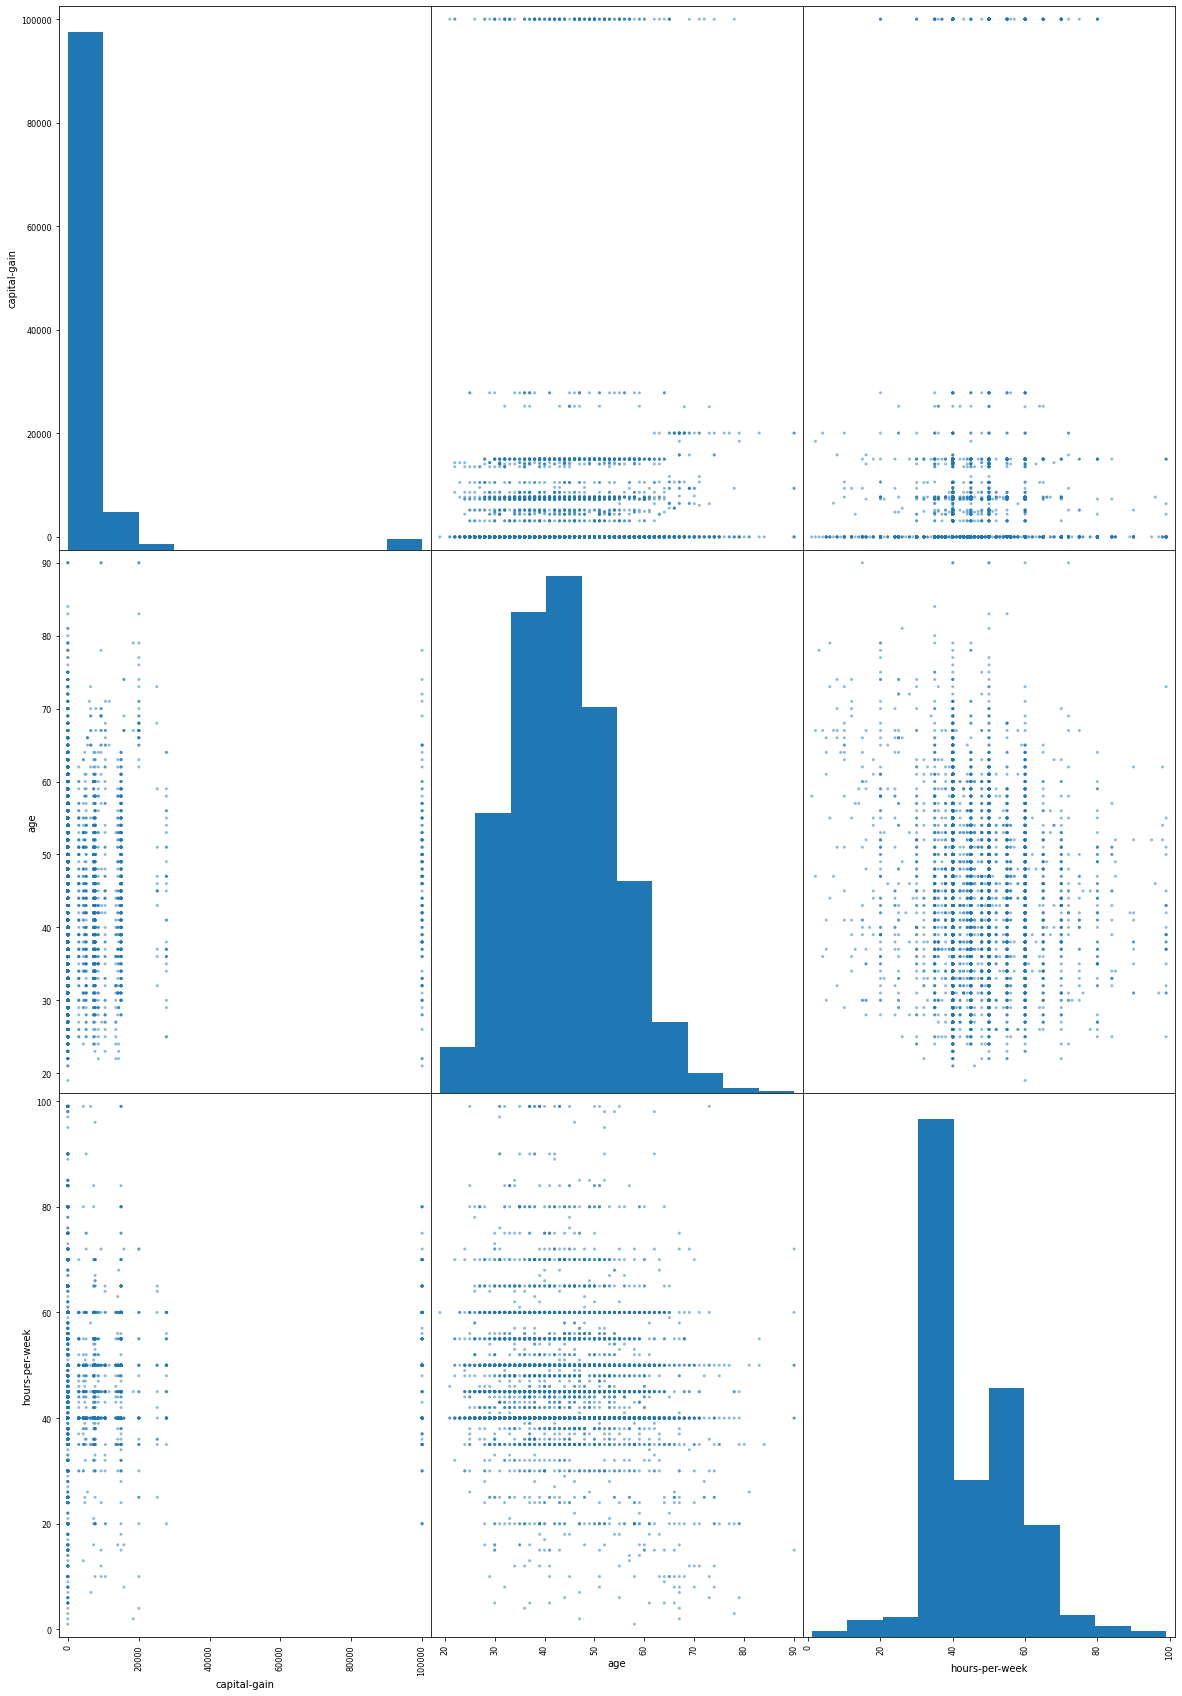

In [76]:
plot_scatter_matrix_above50K('capital-gain', 'age', 'hours-per-week')

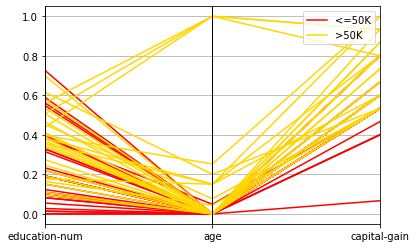

In [115]:
frame_pc = df[['education-num', 'age', 'capital-gain', 'class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
df.index = frame_pc.index
frame_pc['salary-range'] = df['salary-range']
frame_pc.columns = ['capital-gain', 'education-num', 'age', 'class', 'salary-range']
frame_pc_below_50K = frame_pc[frame_pc["class"] == 0.0].sample(n=30)
frame_pc_above_50K = frame_pc[frame_pc["class"] == 1.0].sample(n=30)
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])
pd.plotting.parallel_coordinates(frame_pc, 'salary-range', cols=['education-num', 'age', 'capital-gain'], color=('#FF0000',
                         '#FFD700'))
plt.show()

# Multivariate Analysis between Categorical Data Columns and Salary-Range

Analysis between Occupation and Salary-Range

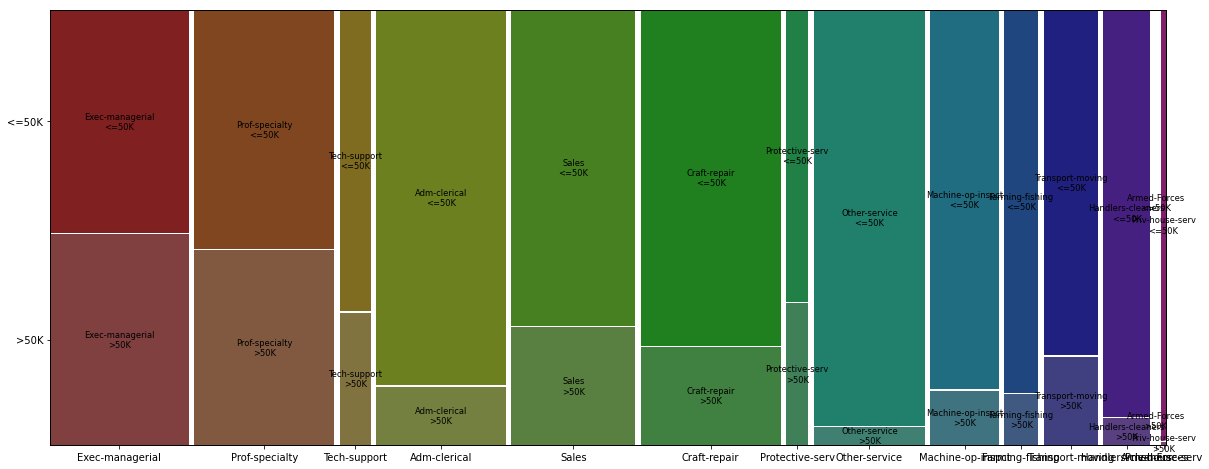

In [96]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize=(20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['occupation', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Marital-Status and Salary-Range

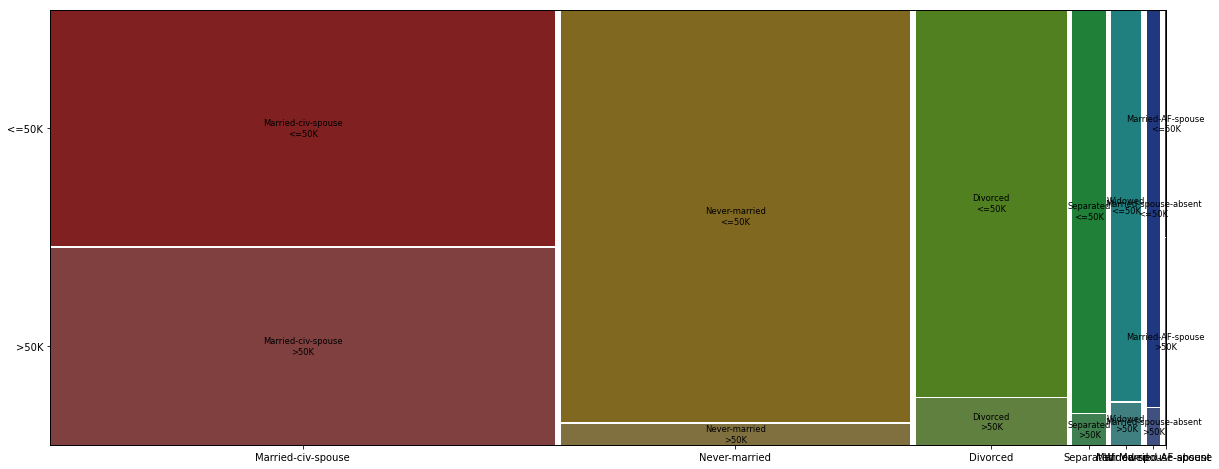

In [97]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize=(20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['marital-status', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Workclass and Salary-Range

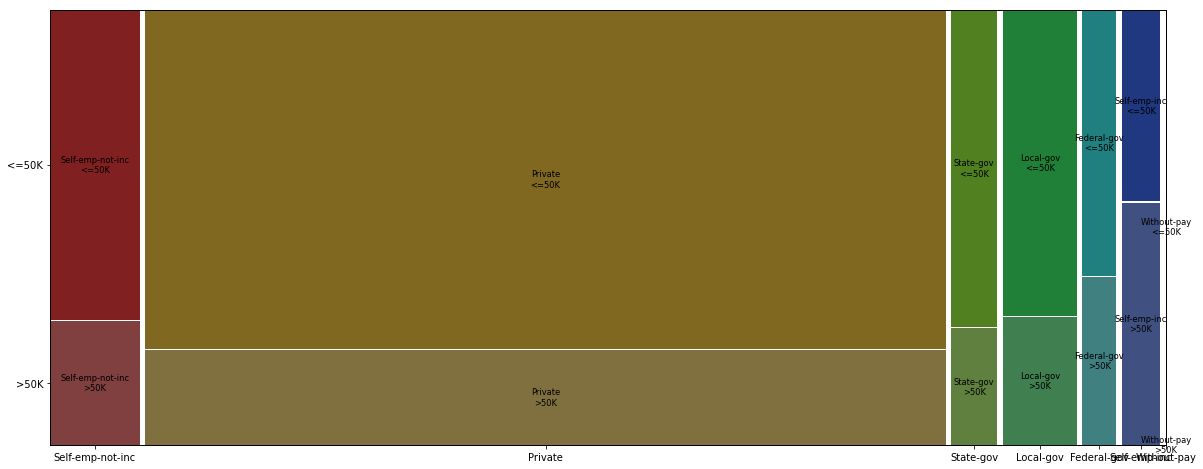

In [98]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['workclass', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Education and Salary-Range

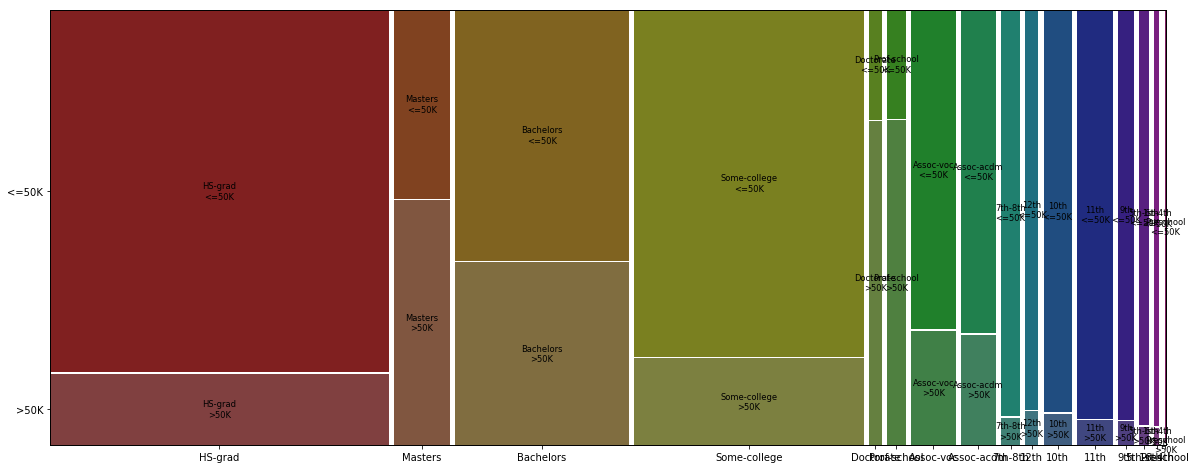

In [99]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['education', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Occupation and Salary-Range

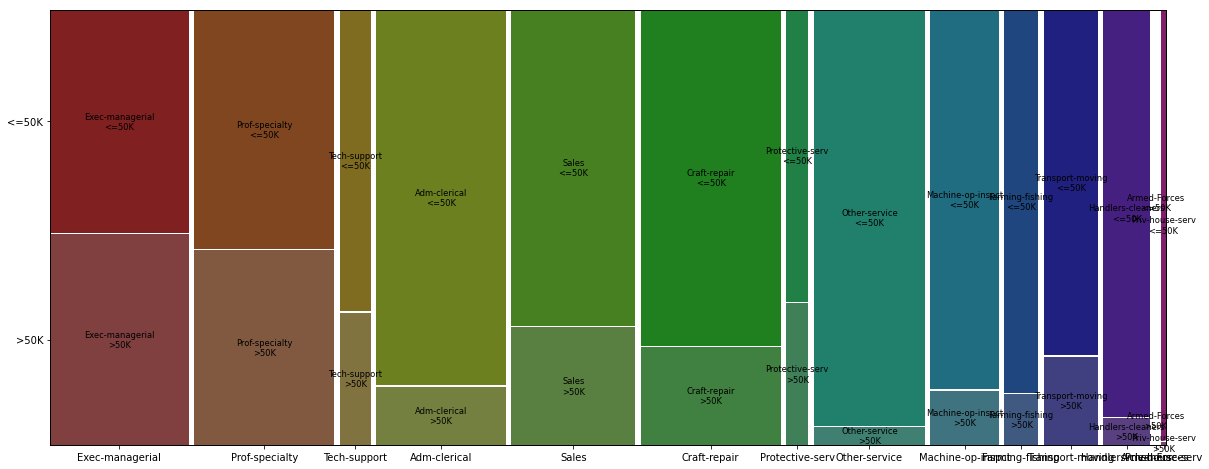

In [100]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['occupation', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Relationship and Salary-Range

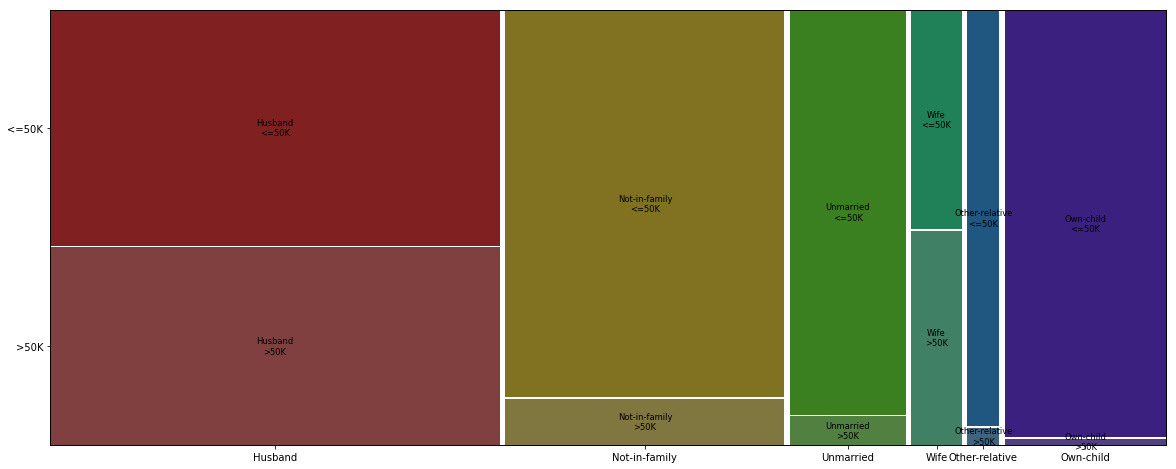

In [101]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['relationship', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Race and Salary-Range

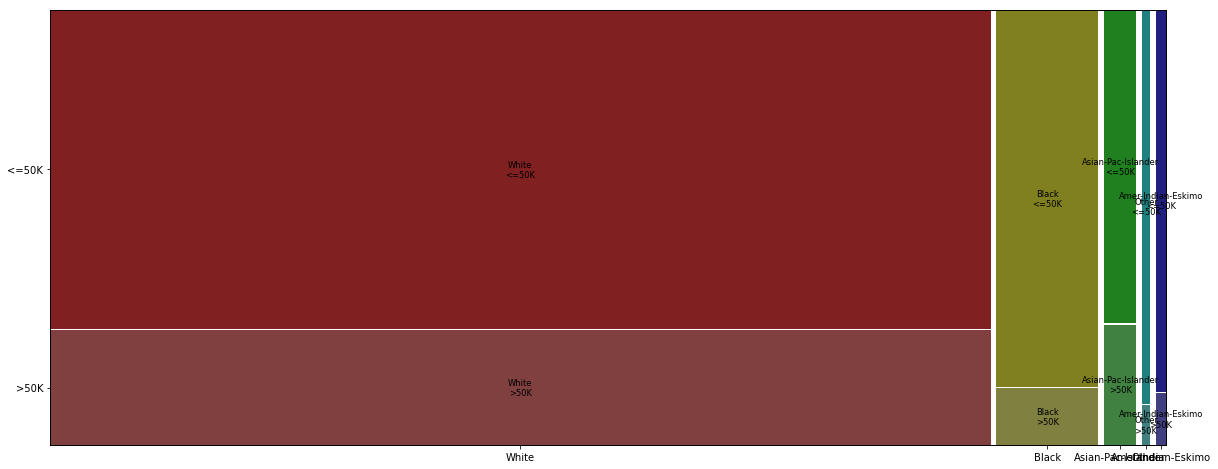

In [102]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['race', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Sex and Salary-Range

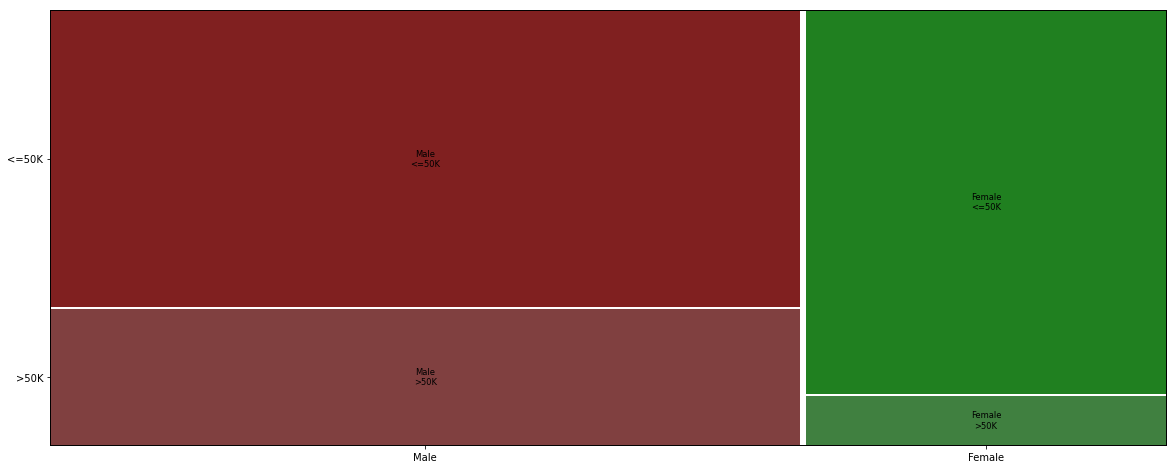

In [103]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['sex', 'salary-range'], ax = axes, axes_label = True)
plt.show()

Analysis between Native-Country and Salary-Range

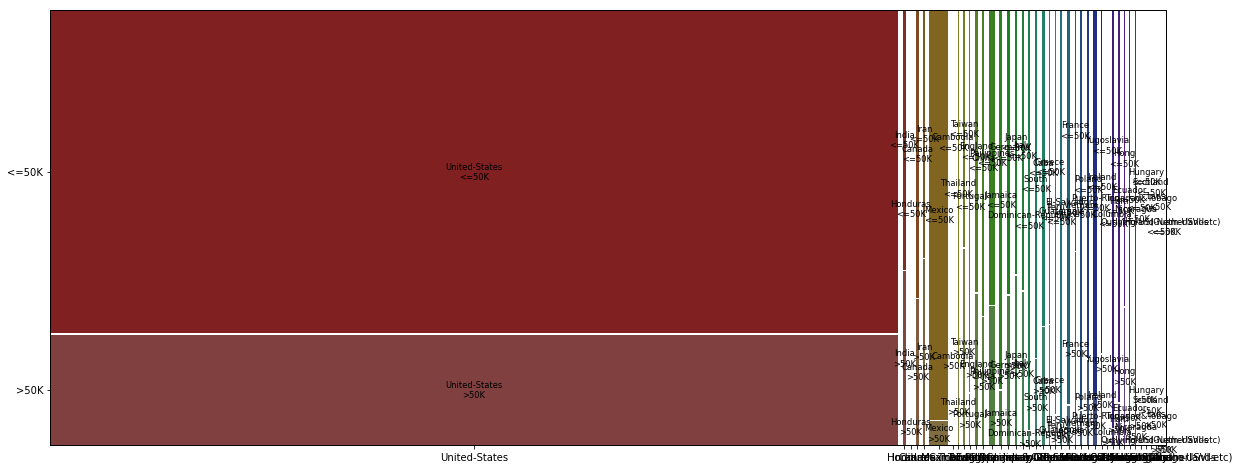

In [104]:
plt.close()
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (20 , 8))
fig.subplots_adjust(hspace = .5)
mosaic(df, ['native-country', 'salary-range'], ax = axes, axes_label = True)
plt.show()

In [139]:
def plot_mosaic_class(column1, column2, column3):
    plt.close()
    cols = [column1, column2, column3]
    for i in range(3):
        for j in range(i+1, 3):
            print("Salary <=50K")
            fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (33 , 15))
            fig.subplots_adjust(hspace = .5)
            mosaic(df_records_below_50K, [cols[i], cols[j]], ax = axes, axes_label = True)
            plt.show()
            print("Salary >50K")
            fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (33 , 15))
            fig.subplots_adjust(hspace = .5)
            mosaic(df_records_above_50K, [cols[i], cols[j]], ax = axes, axes_label = True)
            plt.show()

Salary <=50K


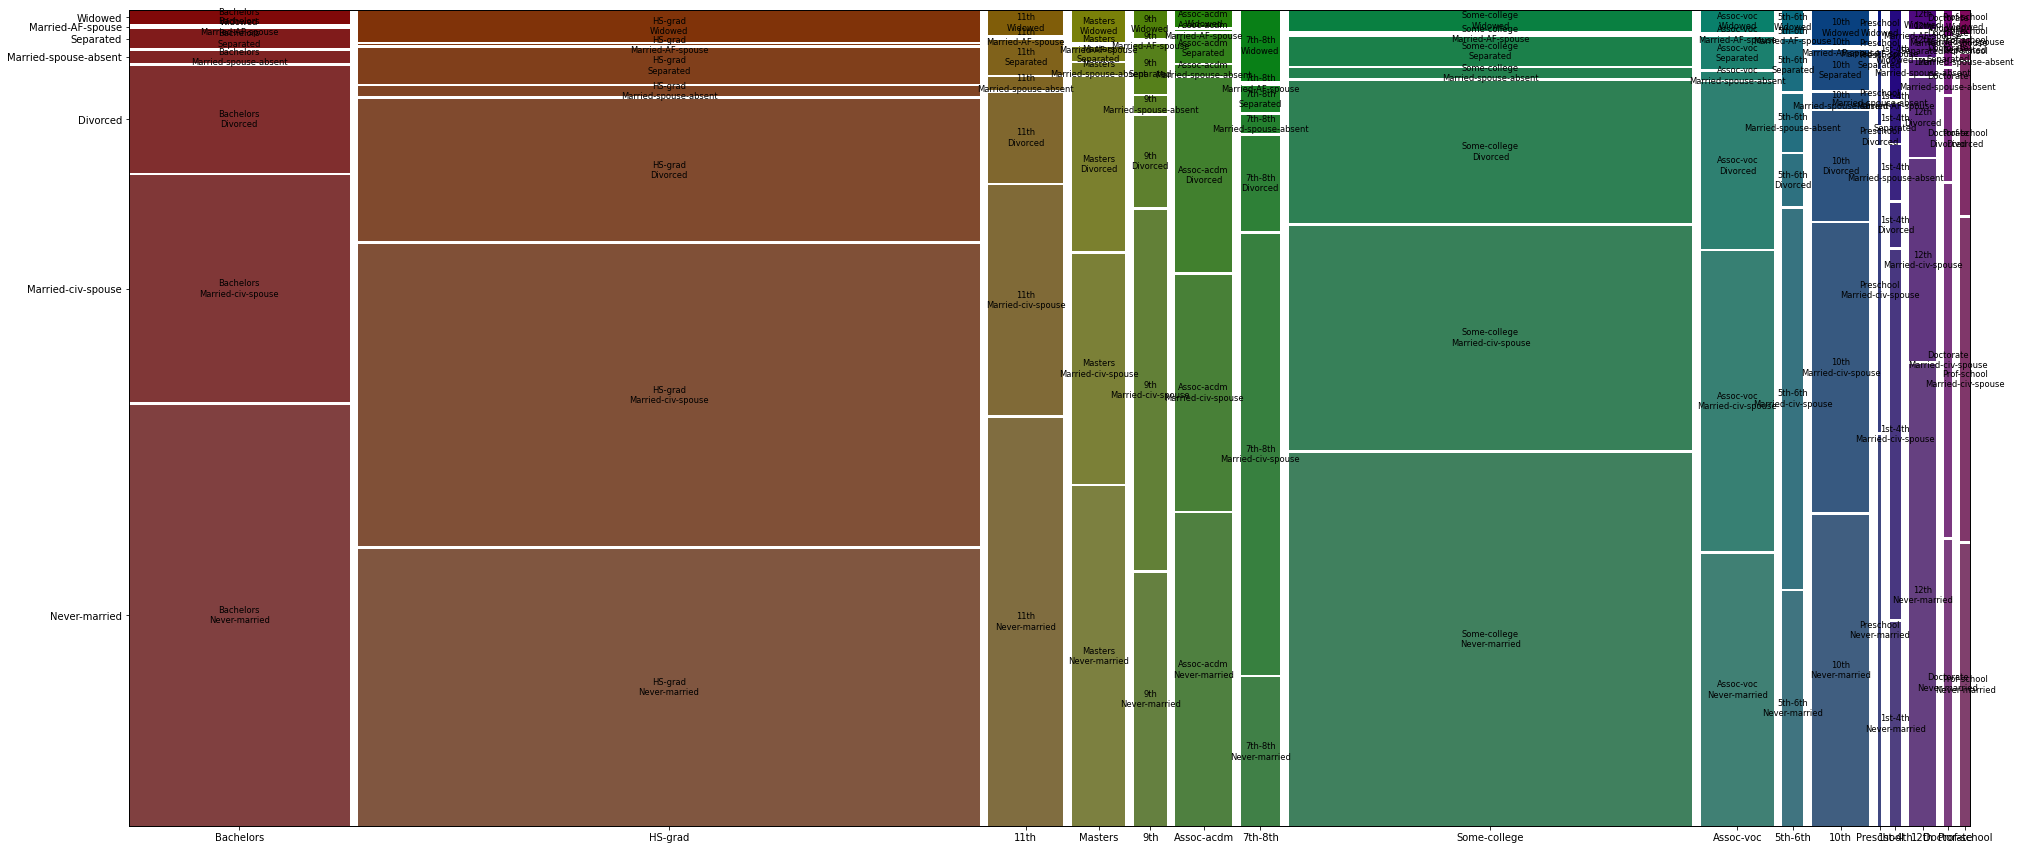

Salary >50K


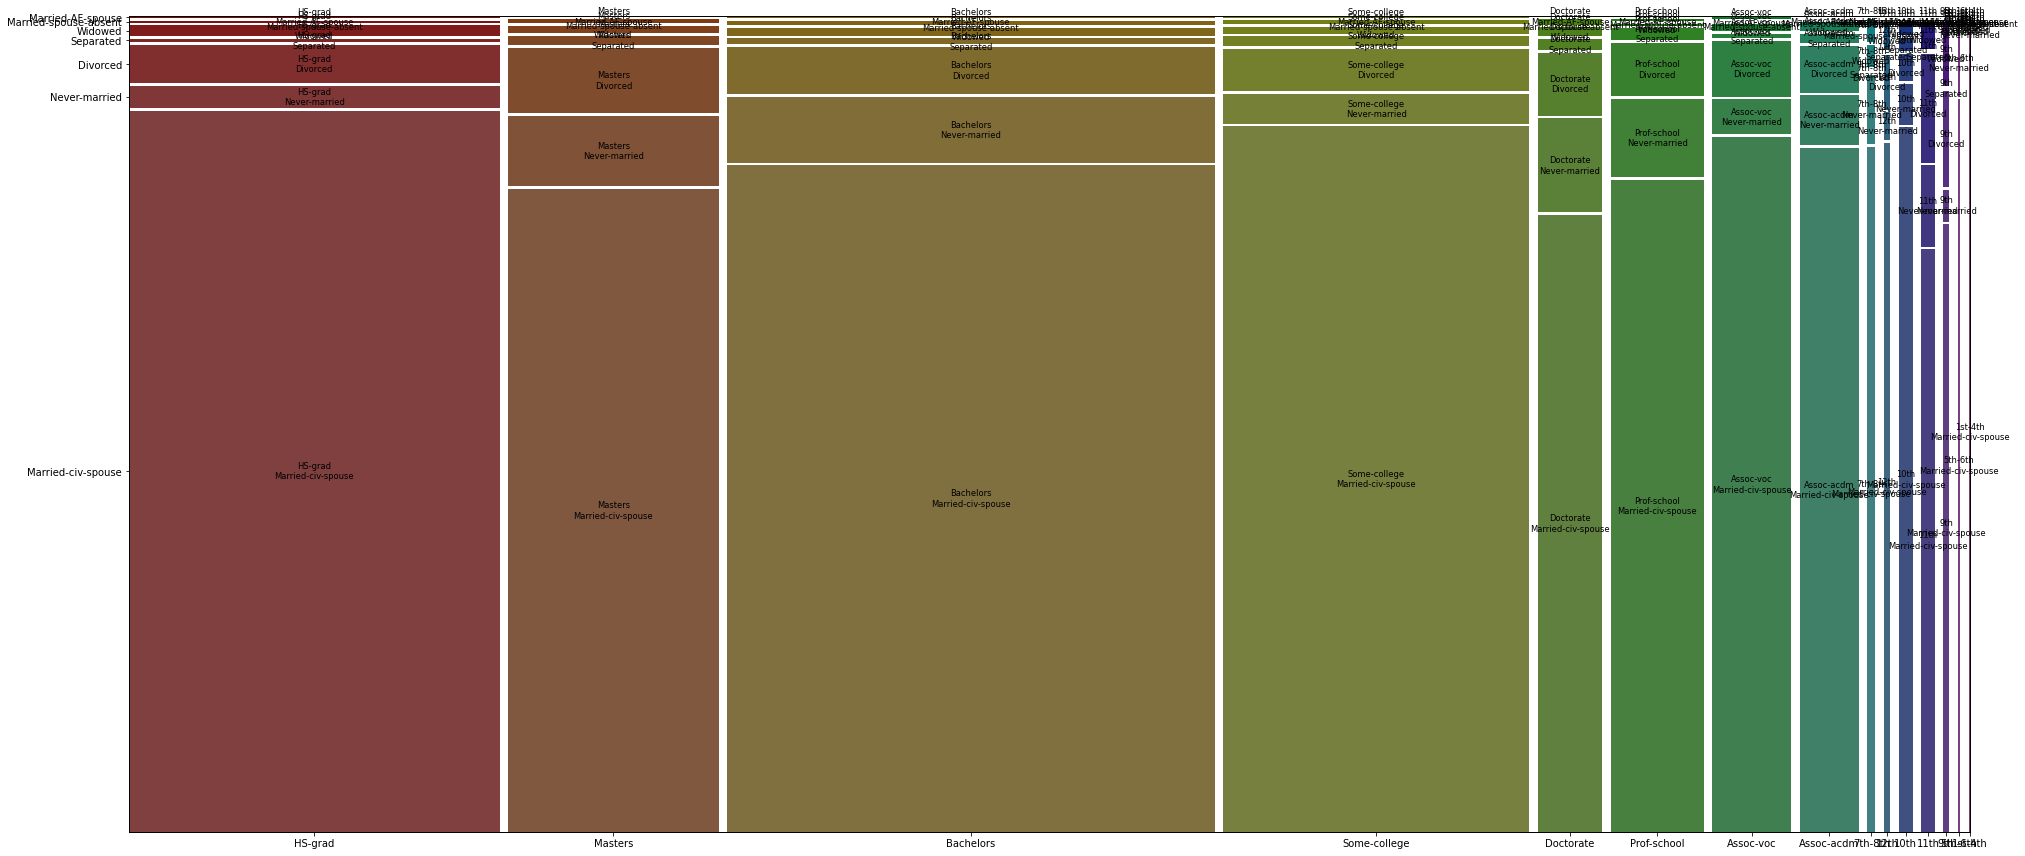

Salary <=50K


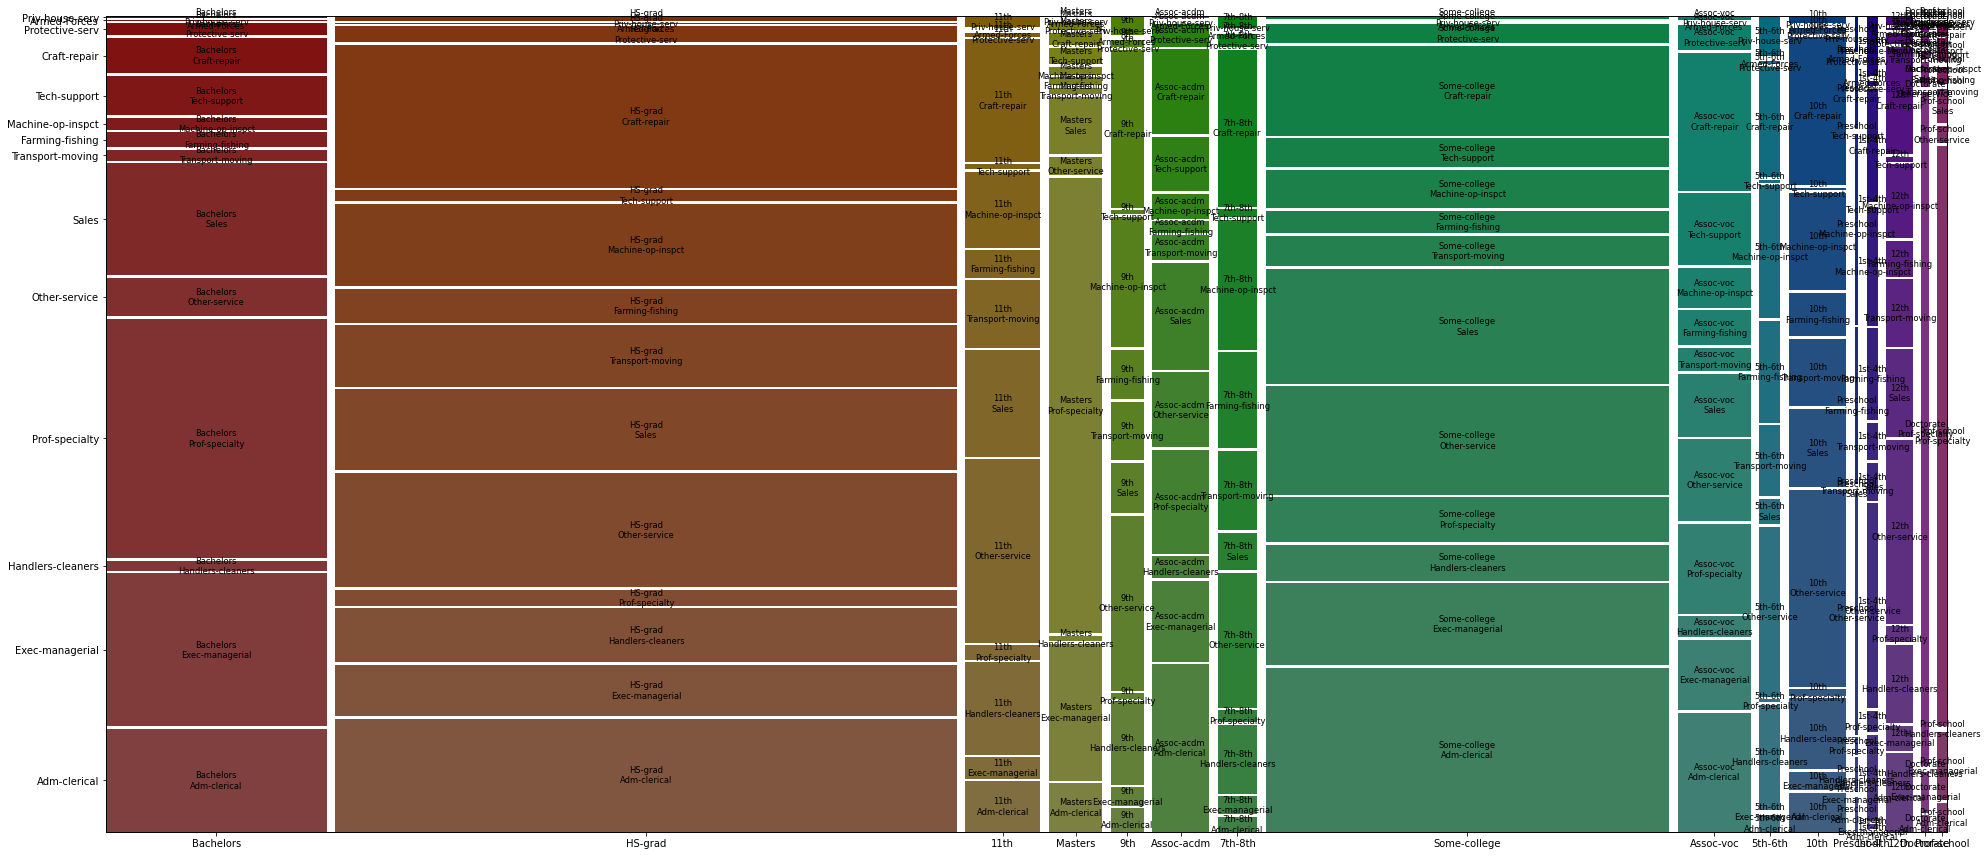

Salary >50K


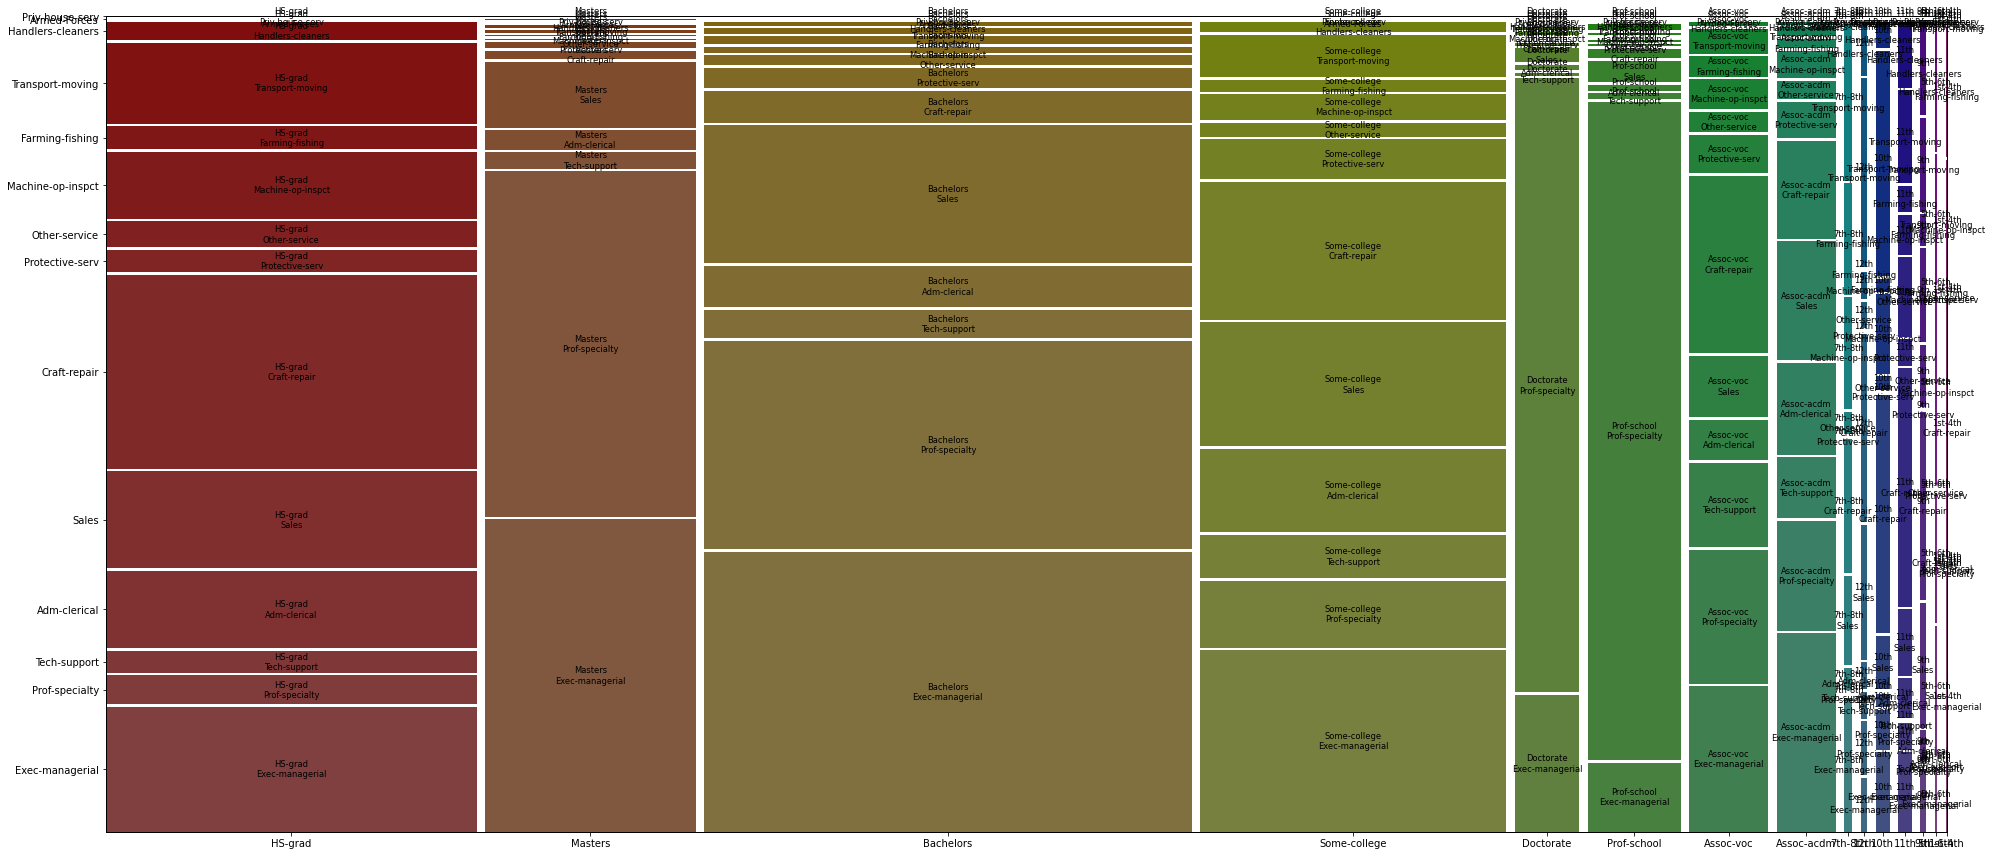

Salary <=50K


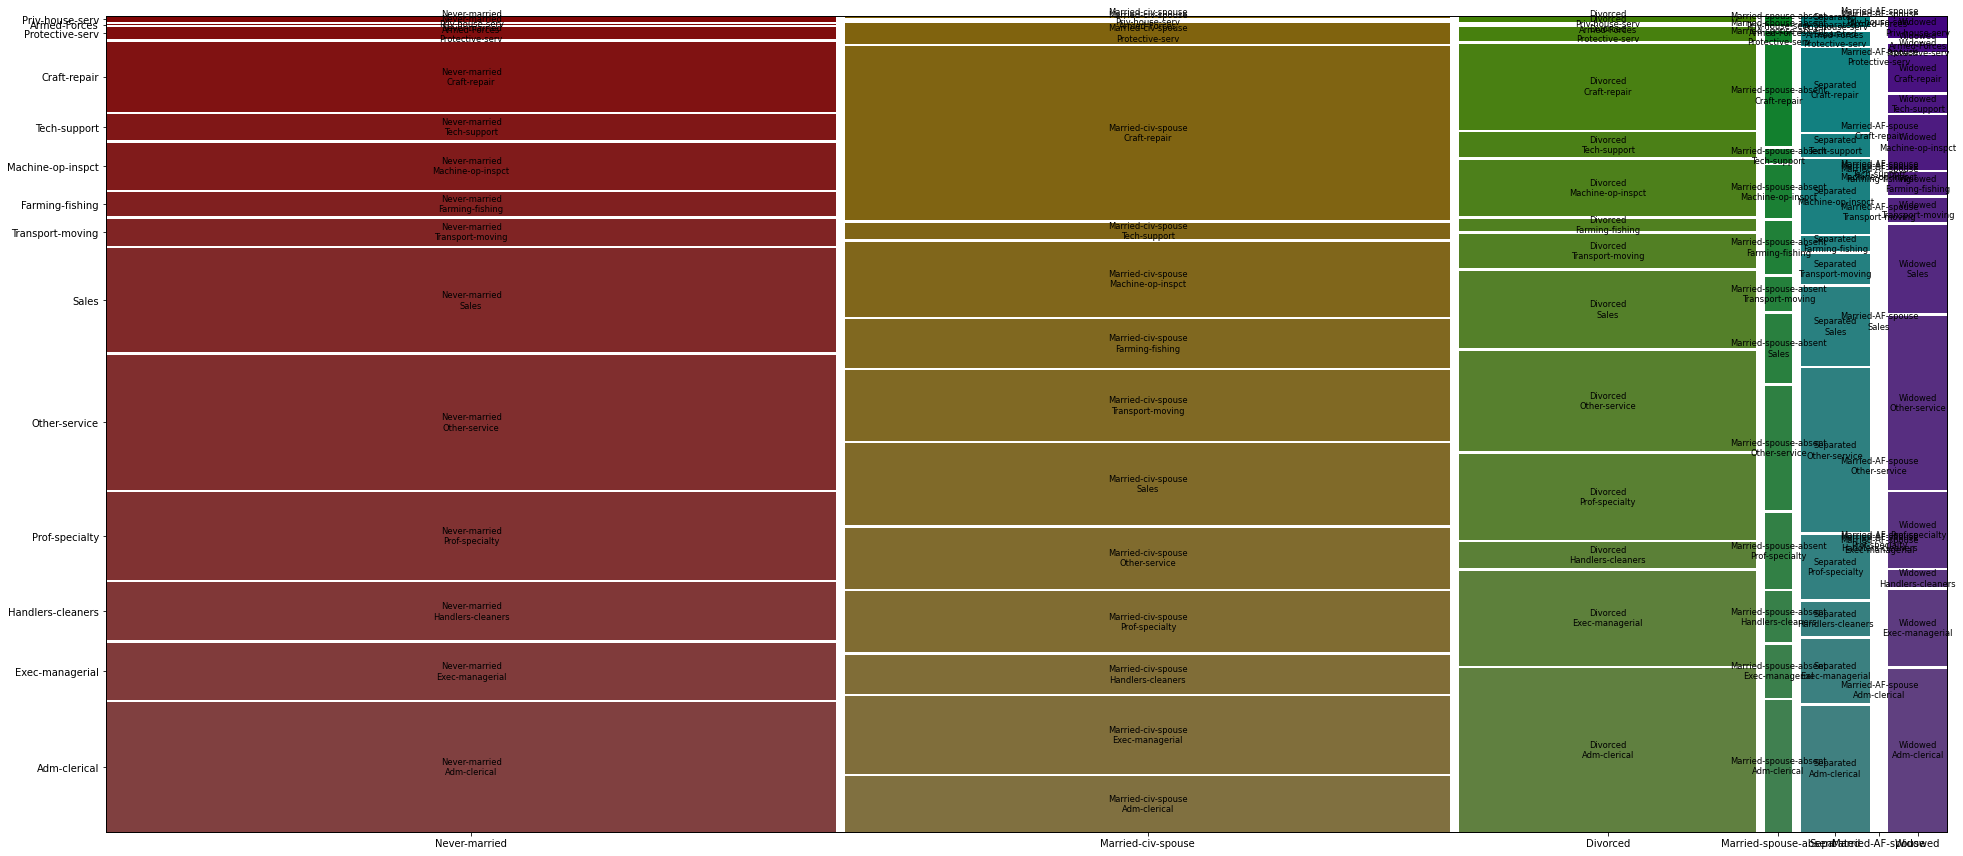

Salary >50K


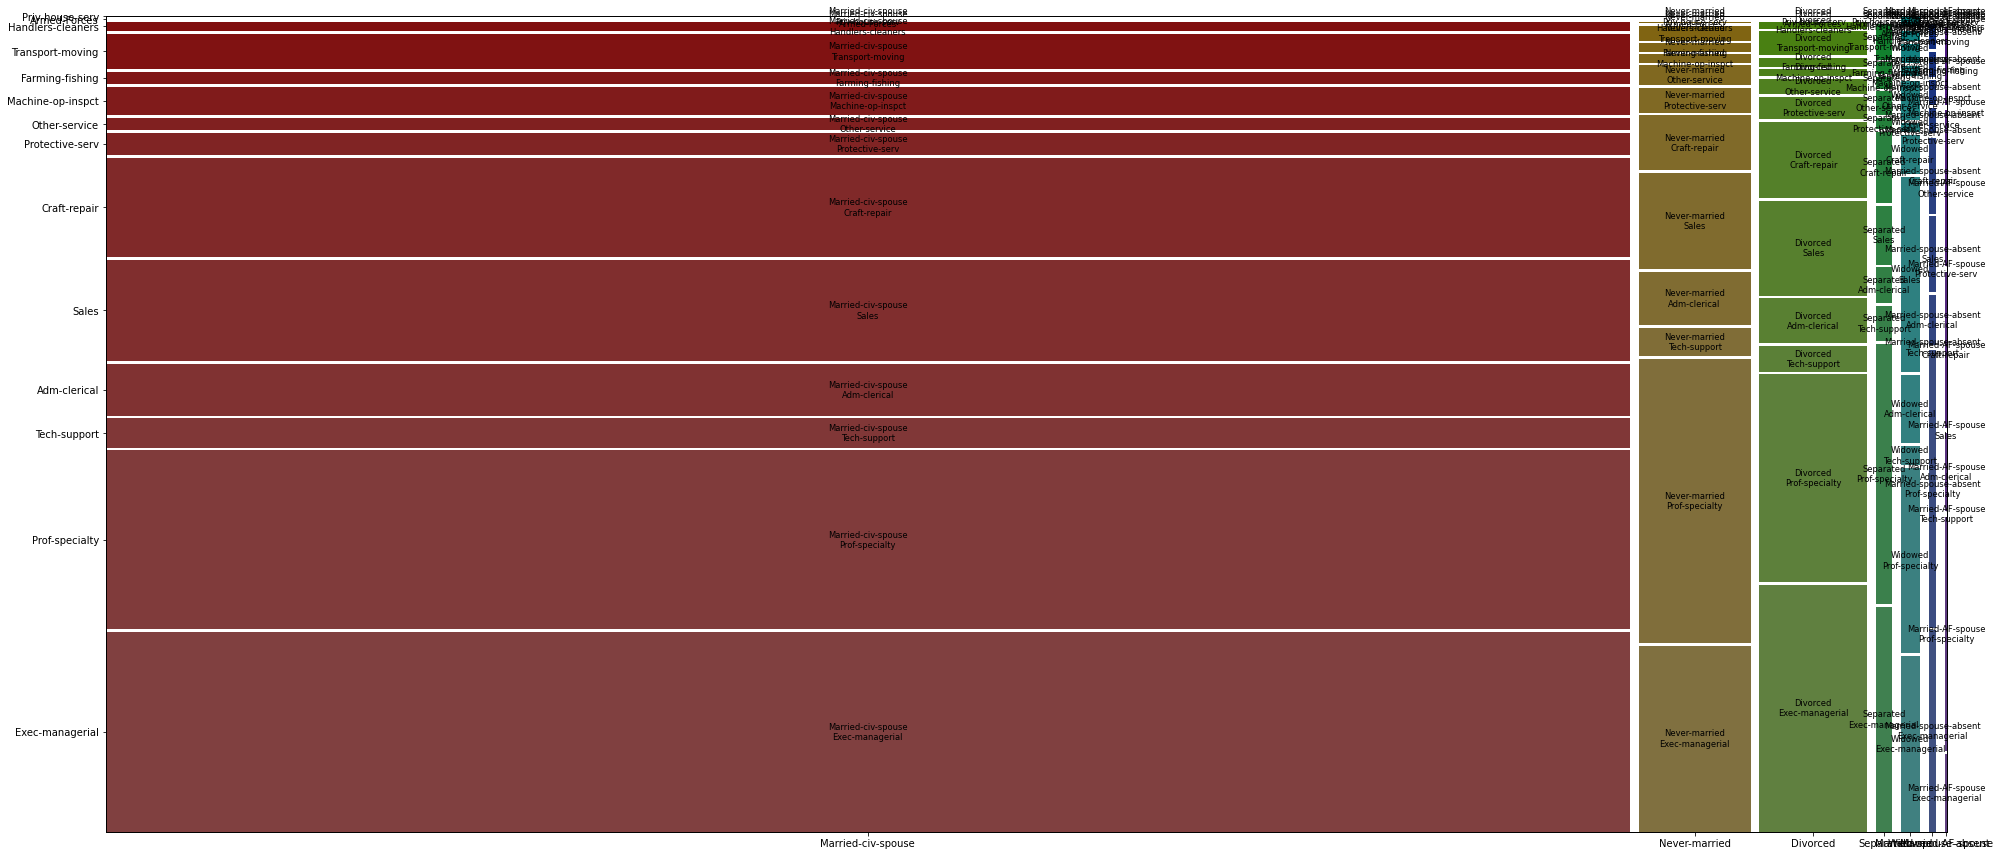

In [140]:
plot_mosaic_class('education', 'marital-status', 'occupation')